Пропорциональный счетчик. Практикум №4

In [475]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

Упражнение 1

In [476]:
def M(u_out, k2, E_gamma):
    # maybe move this out
    C = 100 * pow(10, -12)
    W = 22.5
    k1 = 10
    f = 1/3
    e = 1.6 * pow(10, -19)

    return (C * u_out * W) / (k1 * k2 * f * E_gamma * e)

In [477]:
u_in = np.arange(1670, 1000, -100)
u_out = np.array([0.46, 0.2, 0.086, 0.0331, 0.0125, 0.00734, 0.005])

u_in = np.append(u_in, 0)
u_out = np.append(u_out, 0)

df = pd.DataFrame()
df["u_in"], df["u_out"] = u_in, u_out

0.001869999997823446


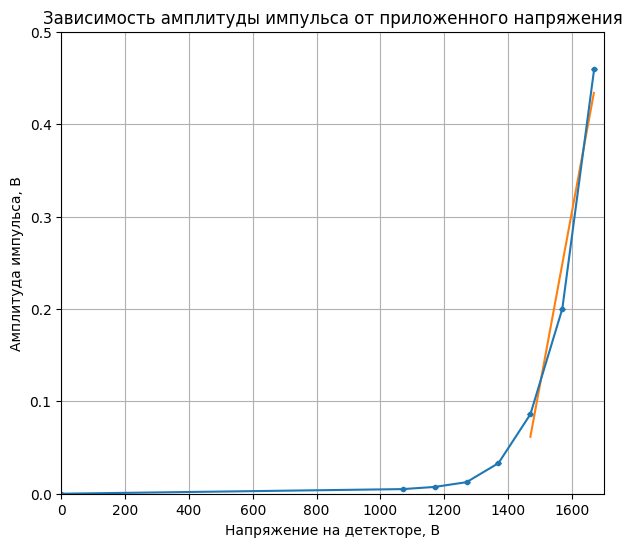

In [478]:
def line(x, a, b):
    return a*x + b

popt, pcov = opt.curve_fit(line, u_in[:3], u_out[:3])

fig, axs = plt.subplots(figsize=(7, 6))
axs.errorbar(u_in, u_out, yerr=0.0*u_out, fmt='.-', capsize=2)
axs.plot(np.arange(1470, 1670), line(np.arange(1470, 1670), popt[0], popt[1]))

plt.ylim(0, 0.5)
plt.xlim(0, 1700)
plt.xticks(np.arange(0, 1700, 200))
plt.yticks(np.arange(0, 0.6, 0.1))

plt.title("Зависимость амплитуды импульса от приложенного напряжения")
plt.grid(True)
plt.xlabel("Напряжение на детекторе, В")
plt.ylabel("Амплитуда импульса, В")

print(popt[0])

Упражнение 2 - градуировка, выполнена на другом компьютере
    
    a = 0.278
    b = 0.111

Упражнение 3 - энергетическое разрешение

In [479]:
energies = np.array([22.1, 24.91, 6.25, 14.44, 5.74, 8.06, 8.75, 10.58, 12.67])
energies_err = np.array([0.17, 0.2, 0.05, 0.12, 0.04, 0.08, 0.08, 0.12, 0.16])
r = np.array([10.8, 10.7, 22.2, 12, 22, 19, 17.8, 12.1, 16.1])

df = pd.DataFrame()
df["energies"], df["energies_err"], df["R"] = energies, energies_err, r
df

,energies,energies_err,R
0,22.10,0.17,10.8
1,24.91,0.20,10.7
2,6.25,0.05,22.2
3,14.44,0.12,12.0
4,5.74,0.04,22.0
5,8.06,0.08,19.0
6,8.75,0.08,17.8
7,10.58,0.12,12.1
8,12.67,0.16,16.1


In [480]:
def neta(E_gamma):
    return 38.6 / pow(E_gamma, 0.5)

def neta_exp(E_gamma, A):
    return A / pow(E_gamma, 0.5)

In [481]:
# approximation with non-linear least squares
popt, pcov = opt.curve_fit(neta_exp, energies, r)
print("A and standard deviation error:")
popt[0], np.sqrt(np.diag(pcov))[0]

A and standard deviation error:


(51.75620270043972, 1.7798213027121328)

Text(0, 0.5, 'R')

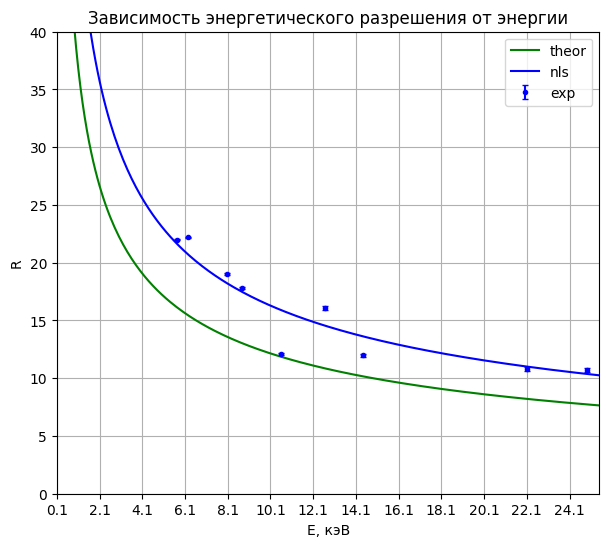

In [482]:
fig, axs = plt.subplots(figsize=(7, 6))
x = np.arange(0.1, 26, 0.1)
axs.errorbar(energies, r, yerr=energies_err, fmt=".", capsize=2, label="exp", color="blue")
axs.plot(x, neta(x), color="green", label="theor")
axs.plot(x, neta_exp(x, *popt), label="nls", color="blue")

plt.ylim(0, 40)
plt.xlim(5, 25.5)
plt.xticks(x[::20])
plt.yticks(np.arange(0, 41, 5))

plt.legend()

plt.title("Зависимость энергетического разрешения от энергии")
plt.grid(True)
plt.xlabel("E, кэВ")
plt.ylabel("R")

Упражнение 4 - оценка эффективности счетчика с помощью таблицы на с 130

In [483]:
def eps(energy, mu0, mu1):
    x1 = 0.02
    x2 = 4.6
    t = 20
    mu2 = mu0 * (273 * 0.85) / (273 + t)
    return np.exp(-mu1*x1) * (1 - np.exp(-mu2*x2))

In [484]:
Eg = np.array([1, 1.143, 1.143, 1.5, 2., 3., 4., 4.782, 4.782, 5., 5.1, 5.1, 5.445, 5.445, 6., 8., 10., 15., 20., 30., 34.561, 34.561, 40., 50., 60., 80., 100.])
mu0 = np.array([9590, 8300, 10300, 5000, 2340, 798, 371, 231, 706, 615, 578, 798, 683, 784, 610, 290, 159, 52.8, 24.1, 7.80, 5.23, 11.5, 9.72, 6.70, 4.63, 2.42, 1.4])
mu1 = np.array([501, 360, 360, 153, 66.4, 19.9, 8.42, 4.65, 4.65, 4.23, 3.90, 3.90, 3.15, 3.15, 2.38, 0.889, 0.406, 0.0989, 0.0398, 0.0161, 0.0140, 0.0140, 0.0130, 0.0132, 0.0142, 0.0163, 0.0182])

mu0 *= 0.006
mu1 *= 1.85

In [485]:
np.exp(- mu0[1] * (273 * 0.85) / (273 + 20)* 4.6), np.exp(- mu0[2] * (273 * 0.85) / (273 + 20)* 4.6)

(1.6121253547444226e-79, 1.6642932300624613e-98)

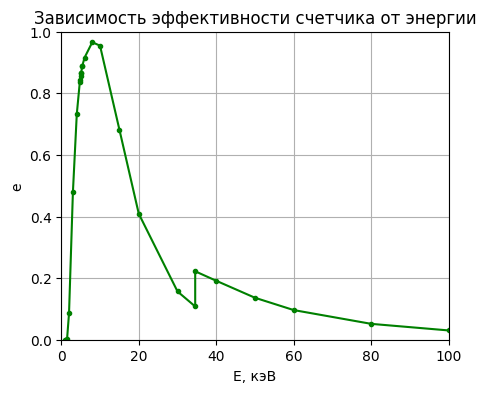

In [486]:
fig, axs = plt.subplots(figsize=(5, 4))
y = eps(Eg, mu0, mu1)
axs.errorbar(Eg, eps(Eg, mu0, mu1), fmt=".-", color="green")
# axs.errorbar(np.arange(0, 34, 0.01), apr_eps(np.arange(0, 34, 0.01), mu1), fmt=".-", color="red")
# axs.errorbar(np.arange(34, 100, 0.01), apr_eps(np.arange(34, 100, 0.01), *popt2), fmt=".-", color="green")

plt.ylim(0, 1)
plt.xlim(0, 100)
plt.title("Зависимость эффективности счетчика от энергии")
plt.ylabel("e")
plt.xlabel("E, кэВ")
plt.grid()

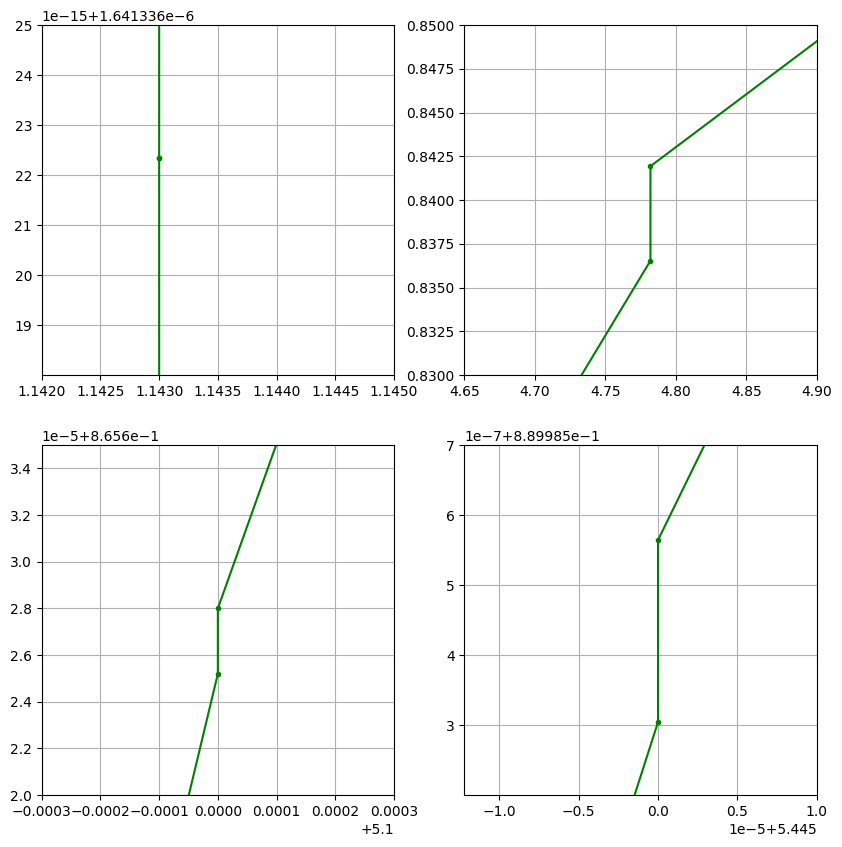

In [487]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0][0].errorbar(Eg, eps(Eg, mu0, mu1), fmt=".-", color="green")
axs[0][0].set_xlim(1.142, 1.145)
axs[0][0].set_ylim(1.641336018 * pow(10, -6), 1.641336025 * pow(10, -6))
axs[0][0].grid()

axs[0][1].errorbar(Eg, eps(Eg, mu0, mu1), fmt=".-", color="green")
axs[0][1].set_xlim(4.65, 4.9)
axs[0][1].set_ylim(0.83, 0.85)
axs[0][1].grid()

axs[1][0].errorbar(Eg, eps(Eg, mu0, mu1), fmt=".-", color="green")
axs[1][0].set_xlim(5.0997, 5.1003)
axs[1][0].set_ylim(0.86562, 0.865635)
axs[1][0].grid()

axs[1][1].errorbar(Eg, eps(Eg, mu0, mu1), fmt=".-", color="green")
axs[1][1].set_xlim(5.4449878, 5.44501)
axs[1][1].set_ylim(0.8899852, 0.8899857)
axs[1][1].grid()

Упражнение 5 - измерение сечения фотоэффекта


In [488]:
# experimental data for Al
al_energies = np.array([5.81, 6.29, 14.46, 22.43, 25.36])
al_mu = np.array([84.2, 65.9, 8.07, 2.27, 1.77])

# experimental data for Cu
cu_energies = np.array([6.18, 22.41, 25.32])
cu_mu = np.array([62.7, 25.3, 18.6])

z = np.array([0, 13, 29])
mu1 = np.array([0, 2.27, 25.3])
mu2 = np.array([0, 1.77, 18.6])

A1: 809667.9695471145
A2: 1101214.33496173


Text(0, 0.5, 'mu, бн')

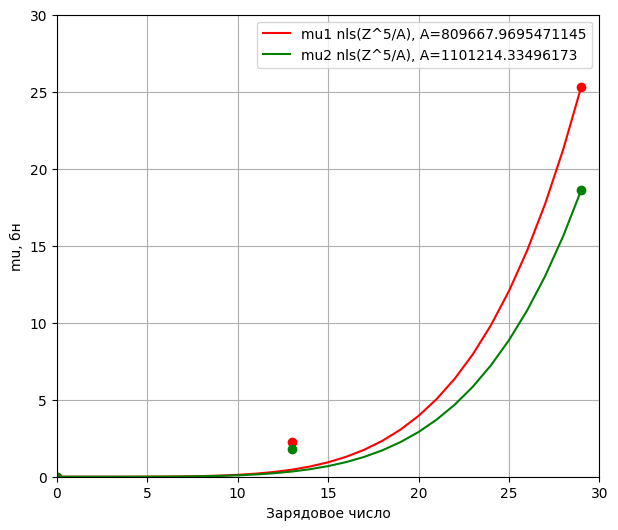

In [489]:
# function for approximation with non-linear least squares method
def sigma_z(z, A):
    return z**5 / A

# for mu1
popt1, pcov1 = opt.curve_fit(sigma_z, np.array([0, 13, 29]), np.array([0, 2.27, 25.3]))

# for mu2
popt2, pcov2 = opt.curve_fit(sigma_z, np.array([0, 13, 29]), np.array([0, 1.77, 18.6]))

print(f"A1: {popt1[0]}\nA2: {popt2[0]}")

# plotting
fig, axs = plt.subplots(figsize=(7, 6))
axs.plot(np.arange(30), sigma_z(np.arange(30), popt1[0]), label=f"mu1 nls(Z^5/A), A={popt1[0]}", color="red")
axs.plot(np.arange(30),  sigma_z(np.arange(30), popt2[0]), label=f"mu2 nls(Z^5/A), A={popt2[0]}", color="green")
axs.scatter(z, mu1, color="red")
axs.scatter(z, mu2, color="green")

axs.set_xlim(0, 30)
axs.set_ylim(0, 30)

axs.grid()
axs.legend()
# axs.set_title("Зависимость сечения реакции фотоэффекта от зарядового числа поглотителя")
axs.set_xlabel("Зарядовое число")
axs.set_ylabel("mu, бн")

C:\Users\krech\AppData\Local\Temp\ipykernel_12416\4045441866.py:2: RuntimeWarning: divide by zero encountered in divide
  return A / pow(E, 3.5)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


40350.20396433589


Text(0, 0.5, 'mu, бн')

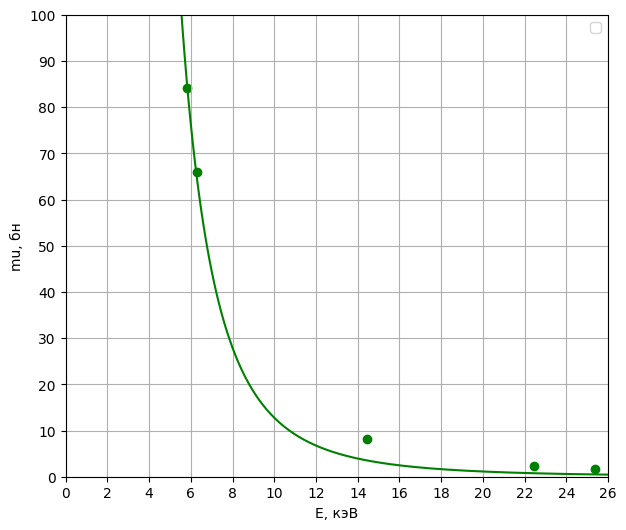

In [490]:
def sigma_E(E, A):
    return A / pow(E, 3.5)

popt, pcov = opt.curve_fit(sigma_E, al_energies, al_mu)
print(popt[0])

fig, axs = plt.subplots(figsize=(7, 6))
axs.scatter(al_energies, al_mu, color="green")
axs.plot(np.arange(0, 27, 0.1), sigma_E(np.arange(0, 27, 0.1), popt[0]), color="green")

plt.ylim(0, 100)
plt.xlim(0, 26)
plt.xticks(np.arange(0, 27, 2))
plt.yticks(np.arange(0, 101, 10))

plt.legend()

# plt.title("Зависимость сечения фотоэффекта от энергии")
plt.grid(True)
plt.xlabel("E, кэВ")
plt.ylabel("mu, бн")